# Fenología del Dipteryx

# Estudiantes
Jose Pablo Jiménez                
Dawa Méndez Álvarez

# Descripción

El proyecto consiste en la exploración, limpieza, procesamiento y análisis de una base de datos del género *Dipteryx* en América. Se utilizan diferentes herramientas, aprendidas en el curso, con el fin de obtener información valiosa sobre la distribución del género y sus características de forma y función. Esto en aras de contribuir al aprovechamiento sostenible del recurso y la conservación de las especies forestales del género.

# Justificación

El género *Dipteryx*, perteneciente a la familia Fabaceae, es de gran importancia ecológica y económica en las regiones tropicales de América del Sur y Central. Los árboles de *Dipteryx* son fundamentales para la conservación de la biodiversidad, ya que proporcionan hábitat y alimento a diversas especies de fauna silvestre. Su madera, dura y resistente, es también apreciada en la construcción y la ebanistería, lo que resalta su relevancia en la economía local. Por estas razones, la conservación de las especies del género *Dipteryx* es vital tanto para los ecosistemas donde se encuentran como para las comunidades humanas que dependen de sus múltiples beneficios.

# Antecedentes
El área de la lamina foliar, la capacidad fotosintética y otras características de las hojas son de gran importancia para determinar la resiliencia de las especies vegetales ante las condiciones climáticas (Niinemets *et al.* 2001, Fyllas *et al.* 2009, Malhado *et al.* 2009). De manera similar, el periódo de floración, el periódo de fructificacion, y el estadio de desarrollo de los organismos son utilizado para estudiar los ciclos de vida de las especies vegetales, su capacidad de adaptación ante cambios ambientales y su riesgo de mortalidad (Wright *et al.* 2011). Sin embargo, la recopialción de esta información requiere de mucho trabajo de campo y largos periodos de muestreo. Más aún, si se desea comparar diferentes sitios o taxa, es necesario revisar la literatura cientifica y tratar de rescatar la información de los artículos. Sin embargo, pocas publicaciones suelen incluir los "datos crudos". De modo que era difícil para un solo investigador recolectar suficiente información para analizar de manera compresiva un taxon. Con el advenimiento de las tecnologías de la comunicación y la Internet, esto se ha vuelto más sencillo. Los investigadores pueden ahora compartir toda su información de manera transparente y nuevos repositorios son creados para almacenar dicha informacion. El problema actual no radica en el acceso a la información, sino en como analizar las grandes cantidades que estamos empezando a acumular. De allí la importancia de la ciencia de datos en el campo de la biología.




# Descripción del problema
A nivel técnico, la base de datos con la que estamos trabajando tiene un acomodo particular lo cuál dificulta el análisis e interpretación de los datos. La base de datos mantienen un número de columnas fijo, referente a los clasificadores. Mientras incluye las variables en las filas. Esto resulta en entradas de una misma observacion o individuo que cuentan con varias filas (una por variable). Más aún, como la base recopila información de diferentes proyecto, sin un estandar establecido, algunas entredas cuenta con más variables que otras. Esto resulta en una gran cantidad de datos nulos y la información que es importante para la toma de decisiones con respecto a su uso y conservación cuesta más detectarla.

A nivel de investigación, se necesita comprender mejor cómo las variables ambientales, como por ejemplo la tasa de radiación solar por mencionar una, influyen en los patrones fenológicos y las caracteríticas fenotípicas de las especies del género *Dipteryx*.

# Objetivo
Analizar los datos de características fenotípicas de especies del género *Dipteryx* y relacionarlos con variables ambientales y su distribución en diferentes regiones de América.

# Descripción del conjuto de datos a utilizar con referencia formal a la fuente

Los datos corresponden a informacion descargada de *TRY - Plant Trait Database* (Kattge *et al.*, 2020; https://try-db.org/TryWeb/Home.php). En esta base de datos se puede solicitar la descarga de información por especie o por caracter. La información se proporciona en un archivo de texto (.txt) comprimido, con codificacion "latin1 swedish ci". Las columnas son delimitadas por tabulaciones y contiene un encabezado en la primera fila. Cada fila corresponde a una entrada, categorizadas como caracteres, covariables, o metadatos. Esto resulta en multiples entradas por registro, i.e. varias filas por individuo.

Los datos utilizados en este ejercicio pueden ser accesados con el siguiente enlace: https://drive.google.com/file/d/16yDnspiMg1bWuAfdfr7e2r0tEz9jlOXk/view?usp=sharing

**Instalar librería**

In [ ]:
#Instalar bibliotecas que se van a utilizar
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib
!pip install ydata-profiling

**Instalar paquetes**

In [ ]:
#Cargar paquetes necesarios para analisis
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from sklearn import datasets
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

**Importar los datos**

In [ ]:
#Cargar datos desde Google Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/2_Cursos/Capacitacion/2024_redbioma_Python_para_Ciencia_de_Datos/ProyectoFinal/Dipteryx.txt', sep='\t', encoding='latin-1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explorar los datos**

In [ ]:
#Crear informe con pandas-profiling
profile = ProfileReport(df, title="Dipteryx", explorative=True)

#Mostrar el informe en un notebook (Jupyter o similares)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

De la exploración de los datos, se evidencia que existen columnas con información que no es relevante para análisis posteriores, por ejemplo: los nombres de la persona que sometio la información a la base de datos o algunos códigos internos de TRY para clasificar los registros.Más aún, algunas presentan información redundante. De manera adicional, se presentan muchas asociaciones espurias, artefactos producto de como esta organizada la base de datos. Finalmente, hay un alto porcentaje de datos nulos o perdidos. De nuevo, producto de como esta organizada la base de datos. Por tanto, es necesario limpiar los datos, filtrando todas aquellas columnas que no sean de utilidad, asi como las celdas vacías.

**Limpieza de datos**

In [ ]:
#Eliminar columnas innecesarias para simplificar el dataframe
df.drop(['LastName', 'FirstName', 'DatasetID', 'Dataset', 'AccSpeciesID',
         'ObsDataID', 'TraitID', 'TraitName', 'DataID', 'ValueKindName',
         'OrigUncertaintyStr', 'UncertaintyName', 'Replicates',
         'RelUncertaintyPercent', 'OrigObsDataID', 'ErrorRisk', 'Comment',
         'StdValueStr', 'Unnamed: 28','StdValue',	'UnitName','Reference'],
        axis=1, inplace=True)

#Eliminar filas con datos perdidos (NaN)
df_clean = df.dropna(subset=['OrigValueStr'])

#Corregir el nombre de la especie Coumarouna odorata por Dipteryx odorata
df_clean.loc[df['SpeciesName'] == 'Coumarouna odorata', 'SpeciesName'] = 'Dipteryx odorata'

#Desplegar el dataframe simplificado y corregido
df_clean

,SpeciesName,AccSpeciesName,ObservationID,DataName,OriglName,OrigValueStr,OrigUnitStr
0,Dipteryx panamensis,Dipteryx oleifera,221146,Plant developmental status / plant age / matur...,Seedlings (True/False),T,NaN
1,Dipteryx panamensis,Dipteryx oleifera,221146,Location Site ID,Geography,"10°46'N, 84°02'W",NaN
2,Dipteryx panamensis,Dipteryx oleifera,221146,Latitude,Latitude,10.77,dec
3,Dipteryx panamensis,Dipteryx oleifera,221146,Longitude,Longitude,-84.03,dec
4,Dipteryx panamensis,Dipteryx oleifera,221146,Vegetation type / Biome,Community type,tropical mosit forest,NaN
...,...,...,...,...,...,...,...
3762,Dipteryx alata,Dipteryx alata,6466292,Location / Site Name,location,Bacaba Municipal Park,NaN
3763,Dipteryx alata,Dipteryx alata,6466292,"Location City, municipality",city,Xavantina,NaN
3764,Dipteryx alata,Dipteryx alata,6466292,Location Region,region,Mato Grosso,NaN
3765,Dipteryx alata,Dipteryx alata,6466292,Location Country,country,Brazil,NaN


In [ ]:
#Mostrar el número de valores únicos en cada columna del dataframe
df_clean.nunique( )

SpeciesName        10
AccSpeciesName      6
ObservationID     147
DataName          186
OriglName         273
OrigValueStr      954
OrigUnitStr        42
dtype: int64

In [ ]:
#Mostrar los valores únicos en la columna DataName para seleccionar
#algunas variables para analizar y visualizar en gráfico
valores_unicos = df_clean['DataName'].unique()
print("Valores únicos en 'DataName':", valores_unicos)

#Contar la frecuencia de cada valor en la columna DataName
frecuencia_valores = df_clean['DataName'].value_counts()
print("\nFrecuencia de cada valor en 'DataName':\n", frecuencia_valores)

Valores únicos en 'DataName': ['Plant developmental status / plant age / maturity / plant life stage'
 'Location Site ID' 'Latitude' 'Longitude' 'Vegetation type / Biome'
 'Mean daily radiation' 'Mean radiation percent of full sunlight'
 'SLA: undefined if petiole in- or excluded' 'Altitude'
 'Soil type (soil order)' 'Soil fertility index (qi_1)'
 'Plant height vegetative' 'Leaf exposition' 'Dataset (1)'
 'Reference / source' 'Treatment: Exposition' 'Family' 'Genus'
 'Leaf area: in case of compound leaves leaf; petiole and rhachis included'
 'SLA disc: mid-vein, petiole and rhachis excluded; sun'
 'SLA: petiole  included' 'SLA lamina: petiole and rhachis excluded; sun'
 'Leaf area: in case of compound leaves leaf; petiole included (1)'
 'SLA disc: mid-vein, petiole and rhachis excluded; shade'
 'SLA leaf; shade' 'SLA lamina: petiole and rhachis excluded; shade'
 'Mean sum of annual precipitation (PPT / MAP / TAP)'
 'Mean length of dry season' 'Parent rock' 'Site species richness'
 'Sit

**Graficar algunas variables**

Radiacion solar e índice de área foliar por sitio

In [ ]:
#Filtrar DataFrame limpio por las variables de interés
df_radiacion = df_clean[df_clean['DataName'] == 'Solar radiation (kJ m-2 day-1)']
df_area = df_clean[df_clean['DataName'] == 'Leaf area index of the site (LAI)']

#Encontrar individuos que tienen ambas variables
individuos_radiacion = set(df_radiacion['ObservationID'])
individuos_area = set(df_area['ObservationID'])

#Intersección de individuos que tienen ambos registros
individuos_ambos = individuos_radiacion & individuos_area

#Verificar si hay individuos en común
if len(individuos_ambos) == 0:
    print("No hay individuos en común entre 'Solar radiation (kJ m-2 day-1)' y 'Leaf area index of the site (LAI)'.")
else:
    #Filtrar el DataFrame original para mostrar sólo estos individuos con las variables específicas
    df_filtrado = df_clean[(df_clean['ObservationID'].isin(individuos_ambos)) & (df_clean['DataName'].isin(['Solar radiation (kJ m-2 day-1)', 'Leaf area index of the site (LAI)']))]
    print("\nRegistros de individuos con ambas variables (radiacion solar y area foliar):")
    print(df_filtrado)



Registros de individuos con ambas variables (radiacion solar y area foliar):
              SpeciesName     AccSpeciesName  ObservationID  \
1772  Dipteryx panamensis  Dipteryx oleifera        3032484   
1813  Dipteryx panamensis  Dipteryx oleifera        3032484   
1844  Dipteryx panamensis  Dipteryx oleifera        3032485   
1885  Dipteryx panamensis  Dipteryx oleifera        3032485   
1916  Dipteryx panamensis  Dipteryx oleifera        3032486   
1957  Dipteryx panamensis  Dipteryx oleifera        3032486   
2061  Dipteryx panamensis  Dipteryx oleifera        3055599   
2102  Dipteryx panamensis  Dipteryx oleifera        3055599   
3440    Dipteryx oleifera  Dipteryx oleifera        3114573   
3478    Dipteryx oleifera  Dipteryx oleifera        3114573   
3509     Dipteryx odorata   Dipteryx odorata        3124677   
3550     Dipteryx odorata   Dipteryx odorata        3124677   
3582     Dipteryx odorata   Dipteryx odorata        3124679   
3620     Dipteryx odorata   Dipteryx odo

<ipython-input-66-1d184d5f0258>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['OrigValueStr'] = pd.to_numeric(df_filtrado['OrigValueStr'], errors='coerce')
<ipython-input-66-1d184d5f0258>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['OrigValueStr'] = df_filtrado['OrigValueStr'].round(2)


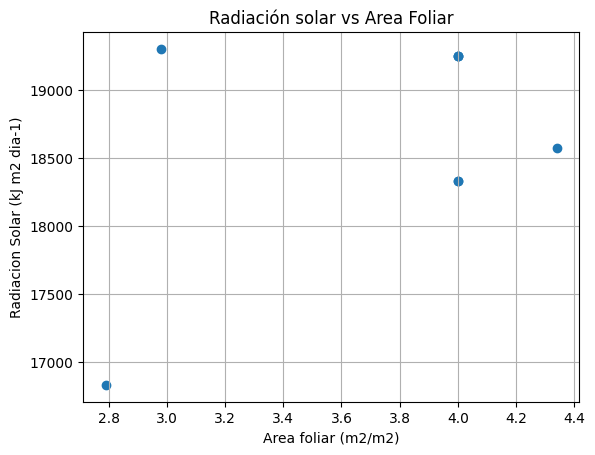

In [ ]:
#Garantizar que los datos de la columna 'OrigValueStr' sean interpretados como
#numericos y luego redondear a dos decimales
df_filtrado['OrigValueStr'] = pd.to_numeric(df_filtrado['OrigValueStr'], errors='coerce')
df_filtrado['OrigValueStr'] = df_filtrado['OrigValueStr'].round(2)

#Crear los vectores con las variables de interes
LAI = df_filtrado[df_filtrado['OriglName'] == 'LAI']['OrigValueStr']
SRAD = df_filtrado[df_filtrado['OriglName'] == 'SRAD']['OrigValueStr']

#Ordenar los datos en forma ascendente, con base en la variable LAI
sorted_indices = np.argsort(LAI)
x_sorted = np.array(LAI)[sorted_indices]
y_sorted = np.array(SRAD)[sorted_indices]

#Crear el grafico de dispersión, especificando el titulo y los ejes
plt.scatter(x_sorted, y_sorted)
plt.xlabel("Area foliar (m2/m2)")
plt.ylabel("Radiacion Solar (kJ m2 dia-1)")
plt.title("Radiación solar vs Area Foliar")
plt.grid(True)

#Mostrar el gráfico
plt.show()

Variabes fenológicas (medio de dispersión)

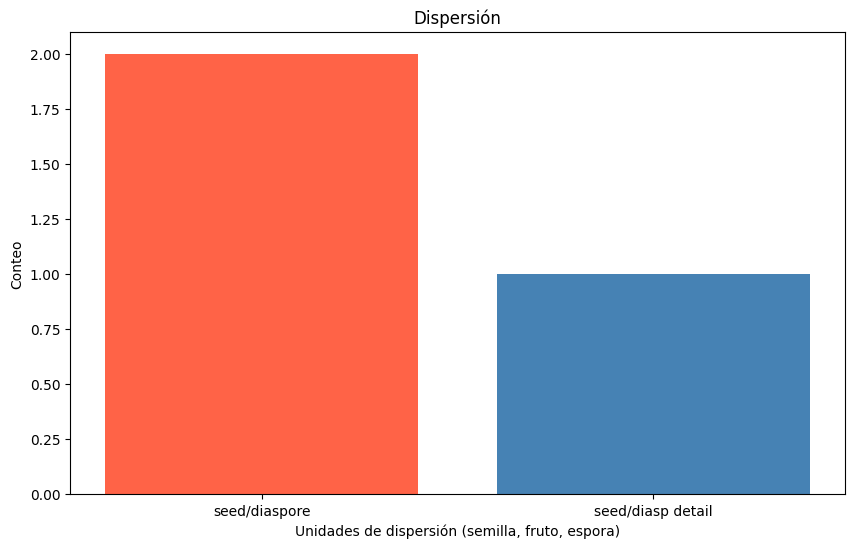

In [82]:
#Filtrar una variable de interes medio de dispersion
df_dispersal = df_clean[(df_clean['DataName'] == 'Dispersal unit (diaspore): seed, fruit or spore') | (df_clean['DataName'] == 'Dispersal unit (diaspore) detail')]

# Colores personalizados para cada barra
colors = ['#FF6347', '#4682B4']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(dispersal_counts.index, dispersal_counts.values, color=colors)
plt.title('Dispersión')
plt.xlabel('Unidades de dispersión (semilla, fruto, espora)')
plt.ylabel('Conteo')
plt.xticks(rotation=0)  # Mantener las etiquetas horizontales
plt.show()

Estado de desarrollo del individuo

In [83]:
#Filtrar variable de interes
df_desarrollo = df_clean[df_clean['DataName'] == 'Plant developmental status / plant age / maturity / plant life stage']

#Corregir nombre de la categoria de crecimiento
df_desarrollo.loc[df_desarrollo['OrigValueStr'] == 'T', 'OrigValueStr'] = 'Seedling'

#Contar las clasificaciones, se observa en que columna esta la clasificacion
desarrollo_counts = df_desarrollo['OrigValueStr'].value_counts()

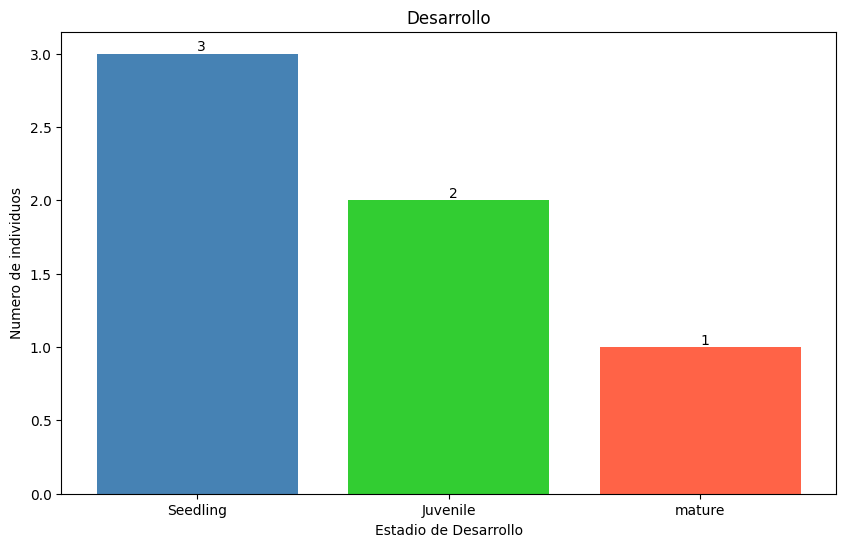

In [84]:
#Colores personalizados para cada barra
colors = ['#4682B4', '#32CD32', '#FF6347']

#Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(desarrollo_counts.index, desarrollo_counts.values, color=colors)
plt.title('Desarrollo')
plt.xlabel('Estadio de Desarrollo')
plt.ylabel('Numero de individuos')
plt.xticks(rotation=0)

#Mostrar los valores encima de cada barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va='bottom' coloca el texto encima de la barra
plt.show()

**Ubicar los datos geográficamente**


In [101]:
#Filtrar por Latitud
df_lat = df[df['OriglName'].str.contains('latitude', case=False, na=False)].copy()

#Cambiar el nombre de la columna con los datos de Latitud
df_lat.rename(columns={'OrigValueStr': 'Latitude'}, inplace=True)

#Filtrar por Longitud
df_lon = df[df['OriglName'].str.contains('longitude', case=False, na=False)].copy()

#Cambiar el nombre de la columna con los datos de Longitud
df_lon.rename(columns={'OrigValueStr': 'Longitude'}, inplace=True)

#Combinar ambos DataFrames en uno solo
df_combined = pd.concat([df_lat.reset_index(drop=True), df_lon.reset_index(drop=True)], axis=1)
df_combined

,SpeciesName,AccSpeciesName,ObservationID,DataName,OriglName,Latitude,OrigUnitStr,SpeciesName,AccSpeciesName,ObservationID,DataName,OriglName,Longitude,OrigUnitStr
0,Dipteryx panamensis,Dipteryx oleifera,221146,Latitude,Latitude,10.77,dec,Dipteryx panamensis,Dipteryx oleifera,221146,Longitude,Longitude,-84.03,dec
1,Dipteryx panamensis,Dipteryx oleifera,221147,Latitude,Latitude,10.77,dec,Dipteryx panamensis,Dipteryx oleifera,221147,Longitude,Longitude,-84.03,dec
2,Dipteryx panamensis,Dipteryx oleifera,221148,Latitude,Latitude,10.77,dec,Dipteryx panamensis,Dipteryx oleifera,221148,Longitude,Longitude,-84.03,dec
3,Dipteryx alata,Dipteryx alata,251789,Latitude,Latitude,-14.38556,NaN,Dipteryx alata,Dipteryx alata,251789,Longitude,Longitude,-61.14778,NaN
4,Dipteryx panamensis,Dipteryx oleifera,1298920,Latitude,decimal latitude,9.15,NaN,Dipteryx panamensis,Dipteryx oleifera,1298920,Longitude,decimal longitude,-79.85,NaN
5,Dipteryx panamensis,Dipteryx oleifera,1298949,Latitude,decimal latitude,9.15,NaN,Dipteryx panamensis,Dipteryx oleifera,1298949,Longitude,decimal longitude,-79.85,NaN
6,Dipteryx oleifera,Dipteryx oleifera,1783916,Latitude,Latitude,8.38,NaN,Dipteryx oleifera,Dipteryx oleifera,1783916,Longitude,Longitude,-80.1,NaN
7,Dipteryx oleifera,Dipteryx oleifera,1783917,Latitude,Latitude,9.1,NaN,Dipteryx oleifera,Dipteryx oleifera,1783917,Longitude,Longitude,-79.6,NaN
8,Dipteryx odorata (Aubl.) Willd.,Dipteryx odorata,1803188,Latitude,latitude,5.54415,NaN,Dipteryx odorata (Aubl.) Willd.,Dipteryx odorata,1803188,Longitude,longitude,-53.8132,NaN
9,Dipteryx odorata (Aubl.) Willd.,Dipteryx odorata,1803189,Latitude,latitude,4.08333,NaN,Dipteryx odorata (Aubl.) Willd.,Dipteryx odorata,1803189,Longitude,longitude,-52.6833,NaN


In [95]:
#Eliminar las columnas duplicadas
columnas_unicas = ~df_combined.columns.duplicated()

#Seleccionar las columnas únicas y crear un nuevo DataFrame para mapear
df_coord = df_combined.loc[:, columnas_unicas]

#Eliminar columnas inncesarias
df_coord.drop(['DataName', 'OriglName', 'OrigUnitStr'], axis=1, inplace=True)
df_coord

<ipython-input-95-277d80e6e9c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coord.drop(['DataName', 'OriglName', 'OrigUnitStr'], axis=1, inplace=True)


,SpeciesName,AccSpeciesName,ObservationID,Latitude,Longitude
0,Dipteryx panamensis,Dipteryx oleifera,221146,10.77,-84.03
1,Dipteryx panamensis,Dipteryx oleifera,221147,10.77,-84.03
2,Dipteryx panamensis,Dipteryx oleifera,221148,10.77,-84.03
3,Dipteryx alata,Dipteryx alata,251789,-14.38556,-61.14778
4,Dipteryx panamensis,Dipteryx oleifera,1298920,9.15,-79.85
5,Dipteryx panamensis,Dipteryx oleifera,1298949,9.15,-79.85
6,Dipteryx oleifera,Dipteryx oleifera,1783916,8.38,-80.1
7,Dipteryx oleifera,Dipteryx oleifera,1783917,9.1,-79.6
8,Dipteryx odorata (Aubl.) Willd.,Dipteryx odorata,1803188,5.54415,-53.8132
9,Dipteryx odorata (Aubl.) Willd.,Dipteryx odorata,1803189,4.08333,-52.6833


<ipython-input-100-3aecd5382e89>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


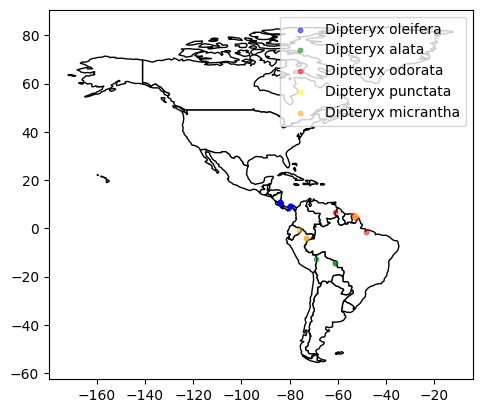

In [100]:
#Cargar un archivo shapefile con información geográfica (geopandas)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Filtrar para tener solo el continente américano (por la especie)
america = world[world['continent'].isin(['North America', 'Central America', 'South America'])]

#Convertir el df_coord en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_coord, geometry=gpd.points_from_xy(df_coord.Longitude, df_coord.Latitude))

#Graficar el mapa base
ax = america.plot(color='white', edgecolor='black')

# Graficar los puntos de cada especie con un color diferente
for especie, color in zip(gdf['AccSpeciesName'].unique(), ['blue', 'green', 'red', 'yellow', 'orange']):
    gdf[gdf['AccSpeciesName'] == especie].plot(ax=ax, color=color, label=especie, markersize=10, alpha=0.5)

# Agregar la leyenda
plt.legend()

# Mostrar el mapa
plt.show()

# Describir los resultados obtenidos

**Limpieza y exploración de los datos:** La tabulación de la base de datos reflejó un arreglo más difícil de solucionar, apesar de hacer la exploración y limpiar los datos, al eliminar columnas, detectar posibles errores como el nombre de las especies. Se observó que ciertas columnas presentan una gran cantidad de variables como la columna "DataName" con más de 100 variables todas de texto mientras que sus datos númericos se encontraban en otra columna "OrigValueStr". Más aún no hay un patrón claro que permita ordenar los datos (i.e. transponer las filas para generar columnas con las variables), pues para cada registro el numero de filas (variables) era diferente dependiendo de la fuente de la información.

**Graficar variables:** Según el gráfico de dispersión de las variables radiacion solar y índice de área foliar, no parece existir una relación clara entra las variables. Sin embargo, aunque se esperaba ver una disminución en el área foliar conforme incrementa la radiación solar, la tendencia es lo opuesto. Pese a que el set de datos cuenta con 147 observaciones independientes (individuos diferentes), muy pocos cuentan con información completa para todas las variables. Por ejemplo revisando las variables presentes en la columna DataName nos damos cuenta que existen pocas variables relacionadas a datos fenologicos y las que existen son de muy poco individuos.

**Mapa de distribución geográfica:** Se observa como 5 especies del género *Dipteryx* se distribuyen en América Central y América del Sur, donde *Dipteryx oleifera* parece estar limitada al itsmo centroamericano (Costa Rica y Panama), mientras las demás especies se pueden encontrar en América del Sur. Lamentablemente solo 60 individuos tenían la ubicación por latitud y longitud, por lo que no se logró mapear el conjunto de datos completo. Para las demás observaciones no se cuenta con datos de ubicación geografica o solo se incluyen referencias a la localidad (provincias, distritos, etc).


# Conclusiones
- El formato de la base de datos es crucial para su utilización. Aunque TRY proporciona un recurso muy valioso, es necesario que se defina un estandar para todos los investigadores que desean contribuir datos. Pues de lo contrario, se vuelve muy dificil poder extraer la información. Es importante mencionar que si existen paquetes de R específicos para exportar y analizar datos de TRY. Sin embargo, no así para Python (aunque es posible que MySQLdb funcione, pero esto escapa los contenidos del curso).

- La exploración de los datos es vital a la hora de trabajar con bases de datos, para deteminar que tipo de análisis realizar y obtener resultados que contribuyan a la toma de decisiones.

- Debido a lo que se observó en la exploración de los datos se tuvo que hacer filtros para poder trabajar con las variables, sin embargo la base de dato requiere de mucha depuración.

- El género *Dipteryx* ha sido definido como neotropical. Existe mayor diversidad de especies en America del Sur, y solo una, *D. oleifera*, alcanza el itsmo centroamericano. Esto puede indicar que los eventos de especiacion que dieron lugar a *D. oleifera* han sido relativamente recientes y la especie no hay tenido la oportunidad de amplia su rango de distribución.

- No se logra el objetivo propuesto, debido a la poca información disponible sobre esos parámetros fenologicos contenidos en la base de datos.

# Referencias
Kattge, J., G. Bönisch, S. Díaz, S. *et al.* (2020) TRY plant trait database – enhanced coverage and open access. Global Change Biology, 26:119–188.

Niinemets, U. (2001). Global-scale climatic controls of leaf dry mass per area, density, and thickness in trees and shrubs. Ecology 82:453-469.

Fyllas, N. M., S. Patino, T. R. Baker, et al. (2009). Basin-wide variations in foliar properties of Amazonian forest: phylogeny, soils and climate. Biogeosciences 6:2677-2708.

Malhado ACM, Malhi Y, Whittaker RJ, et al. (2009). Spatial trends in leaf size of Amazonian rainforest trees. Biogeoscience 6, 1563-1576.

Wright, S. J., K. Kitajima, N. J. B. Kraft, et al. (2011). Functional traits and the growth-mortality tradeoff in tropical trees. Ecology 91:3664-3674.